In [1]:
import Keypoints
import numpy as np
import tensorflow.keras as keras
from tensorflow.keras import layers
import random

In [2]:
seed = [*range(15)]
random.shuffle(seed)
label = np.array([i for i in range(3) for _ in range(5)])
label = np.array(label[seed])
print(label)
cnt = 0
r = ['D', 'F', 'L', 'R', 'U']
li = np.array([])

[2 1 1 0 2 0 0 1 1 0 0 2 2 2 1]


In [3]:
for k in [1, 6, 28]:
    for i in r:
        cnt += 1
        a, b, c = map(np.array, Keypoints.getkey_from_vid(f'./원시데이터/NIA_SL_SEN000{k}_REAL01_{i}.mp4'))
        print(f"Data Loading... {cnt}/{15}")
        data = np.concatenate([a, b, c], axis=1)
        data = np.array([data[-20:-5][:]])
        if i == 'D' and k == 1:
            li = data
        else:
            li = np.vstack([li, data])
li = np.array(li[seed])

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Data Loading... 1/15
Data Loading... 2/15
Data Loading... 3/15
Data Loading... 4/15
Data Loading... 5/15
Data Loading... 6/15
Data Loading... 7/15
Data Loading... 8/15
Data Loading... 9/15
Data Loading... 10/15
Data Loading... 11/15
Data Loading... 12/15
Data Loading... 13/15
Data Loading... 14/15
Data Loading... 15/15


In [35]:
cnt = 0
val_label = [0, 1, 2]
for i in [1, 6, 28]:
    cnt += 1
    a, b, c = map(np.array, Keypoints.getkey_from_vid(f'./validation/0{i}.mp4'))
    data = np.concatenate([a, b, c], axis=1)
    data = np.array([data[-20:-5][:]])
    if cnt == 1:
        val_li = data
    else:
        val_li = np.vstack([val_li, data])

In [4]:
li.shape

(15, 15, 167)

In [38]:
val_li.shape

(3, 15, 167)

In [43]:
val_label = np.array(val_label)
val_label.shape

(3,)

In [5]:
from tensorflow.keras.utils import to_categorical
label = to_categorical(label)
print(label)
label.shape

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


(15, 3)

In [44]:
val_label = to_categorical(val_label)

In [46]:
import tensorflow as tf

with tf.device("/CPU:0"):
    model = keras.Sequential()
    model.add(layers.GRU(32, input_shape=(15, 167)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 32)                19296     
                                                                 
 dense_22 (Dense)            (None, 64)                2112      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_23 (Dense)            (None, 3)                 195       
                                                                 
Total params: 21,603
Trainable params: 21,603
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(li, label, epochs=100, validation_data=(val_li, val_label))
model.save("TestGru.h5")

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0992 - acc: 0.6000 - val_loss: 1.1018 - val_acc: 0.3333
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 1.0944 - acc: 0.5333 - val_loss: 1.1000 - val_acc: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 1.0924 - acc: 0.5333 - val_loss: 1.0980 - val_acc: 0.3333
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 1.0910 - acc: 0.5333 - val_loss: 1.0959 - val_acc: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 1.0851 - acc: 0.6667 - val_loss: 1.0939 - val_acc: 0.6667
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 1.0823 - acc: 0.5333 - val_loss: 1.0921 - val_acc: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 1.0834 - acc: 0.4667 - val_loss: 1.0903 - val_acc: 0.6667
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 1.0756 - acc: 0.6667

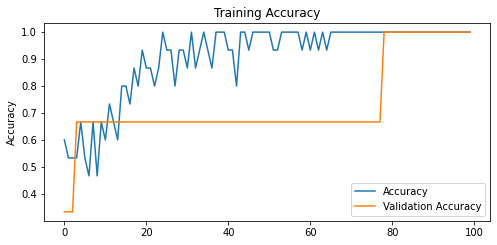

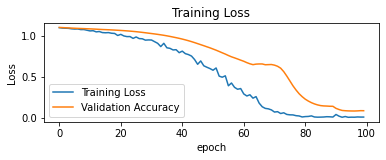

In [49]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Accuracy')
plt.legend()
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')

plt.show()

In [45]:
model.evaluate(val_li, val_label)

1/1 [==============================] - 0s 265ms/step - loss: 0.0978 - acc: 1.0000


[0.09776139259338379, 1.0]

In [53]:
a, b, c = map(np.array, Keypoints.getkey_from_cam())
data = np.concatenate([a, b, c], axis=1)
data = np.array([data[-10:-5][:]])
data.shape

127
20
20


(1, 5, 167)

(167,)

In [20]:
import cv2

for i in range(5):
    cv2.imshow("1", data[0][i])
    cv2.waitKey()
    cv2.destroyAllWindows()

In [54]:
model.predict(data)

array([[9.9564254e-01, 4.3571130e-03, 3.6100619e-07]], dtype=float32)

In [56]:
a, b, c = map(np.array, Keypoints.getkey_from_cam())
test_2 = np.concatenate([a, b, c], axis=1)

127
20
20


In [57]:
test_data = np.array([test_2[-10:-5][:]])

In [60]:
test_data = np.array([test_2[-15:-10][:]])
test_data.shape

(1, 5, 167)

In [61]:
model.predict(test_data)

array([[9.9991834e-01, 8.1593666e-05, 3.0518663e-08]], dtype=float32)

In [41]:
a, b, c = map(np.array, Keypoints.getkey_from_cam())
test_3 = np.concatenate([a, b, c], axis=1)

127
20
20


In [43]:
test_3_final = np.array([test_3[-10:-5][:]])

In [44]:
test_3_final.shape

(1, 5, 167)

In [45]:
model.predict(test_3_final)

array([[9.9997377e-01, 2.6079653e-05, 1.4107437e-07]], dtype=float32)

In [63]:
done = False
cnt = 1
while not done:
    if cnt % 5 == 0:
        a, b, c = map(np.array, Keypoints.getkey_from_cam())
        test = np.concatenate([a, b, c], axis=1)
        test_out = np.array(test[-5:][:])
        print(model.predict(test_out))
    cnt += 1

127
20
20


ValueError: in user code:

    File "/usr/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/usr/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/usr/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/lib/python3.9/site-packages/keras/engine/input_spec.py", line 213, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_4" (type Sequential).
    
    Input 0 of layer "gru_4" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 167)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 167), dtype=float32)
      • training=False
      • mask=None
